# Plotar gráficos de LIWC dos comentários com dados do servidor

In [1]:
import pandas as pd

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/red_pill_analises/'

caminho_comentatios = 'data_base/resultados/comentarios_com_liwc.csv'
# caminho_canais = 'data_base/resultados/canais_com_liwc.csv'
#caminho_videos = 'data_base/resultados/videos_com_liwc.csv'

# df_canais = pd.read_csv(folder_path + caminho_canais)
#df_videos = pd.read_csv(folder_path + caminho_videos)
df_comentarios = pd.read_csv(folder_path + caminho_comentatios)

Mounted at /content/drive


/tmp/ipython-input-1287896716.py:12: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comentarios = pd.read_csv(folder_path + caminho_comentatios)


In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Atualiza fonte
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 10,
    'axes.titlesize': 21,
    'axes.labelsize': 21,
    'xtick.labelsize': 18,
    'ytick.labelsize': 21,
    'legend.fontsize': 20,
})

def plot_multiple_zscore_heatmaps(texts_df):
    categories_to_plot_z = [
        "work_zscore", "money_zscore", "achieve_zscore",
        "sexual_zscore", "bio_zscore",
        "insight_zscore", "relig_zscore", "death_zscore",
        "social_zscore", "family_zscore", "friend_zscore", "humans_zscore"
    ]

    # Verifica se a coluna 'id_canal_anonimizado' está presente
    if 'id_canal_anonimizado' not in texts_df.columns:
        raise ValueError("A coluna 'id_canal_anonimizado' é necessária no DataFrame.")

    # Ordena os canais numericamente
    topics = sorted(texts_df['id_canal_anonimizado'].unique(), key=lambda x: int(x.replace("canal_", "")))

    # Calcula a média dos z-scores por canal
    counts_matrix_z = {
        category: texts_df.groupby('id_canal_anonimizado')[category].mean()
        for category in categories_to_plot_z
        if category in texts_df.columns
    }
    df_zscore = pd.DataFrame(counts_matrix_z)

    # Reordena os canais (colunas)
    df_zscore = df_zscore.T[topics]

    # Remove o sufixo "_zscore" do índice (categorias)
    df_zscore.index = [cat.replace("_zscore", "") for cat in df_zscore.index]

    # Lista de limites para o eixo de cores
    zscore_ranges = [1, 2, 3, 4]

    # Cria um gráfico para cada intervalo de z-score
    for z in zscore_ranges:
        plt.figure(figsize=(20, 10))
        ax = sns.heatmap(
            df_zscore,
            cmap="coolwarm",
            center=0,
            vmin=-z,
            vmax=z,
            annot=False, # Changed to False to remove annotations
            linewidths=0.5,
            cbar_kws={'label': 'Categorias LIWC por Canal (Z-score)'},
            xticklabels=[topic.replace("canal_", "") for topic in topics], # Modify x-axis labels
        )

        plt.yticks(rotation=0, fontsize=26)
        plt.xticks(rotation=0, ha="center", fontsize=20)
        plt.ylabel("Categorias LIWC", fontsize=26)
        plt.xlabel("Canais", fontsize=26)
        # plt.title(f"Heatmap de Z-Scores com Intervalo de -{z} a {z}", fontsize=28)
        plt.tight_layout()
        plt.show()
# plot_multiple_zscore_heatmaps(df_videos)

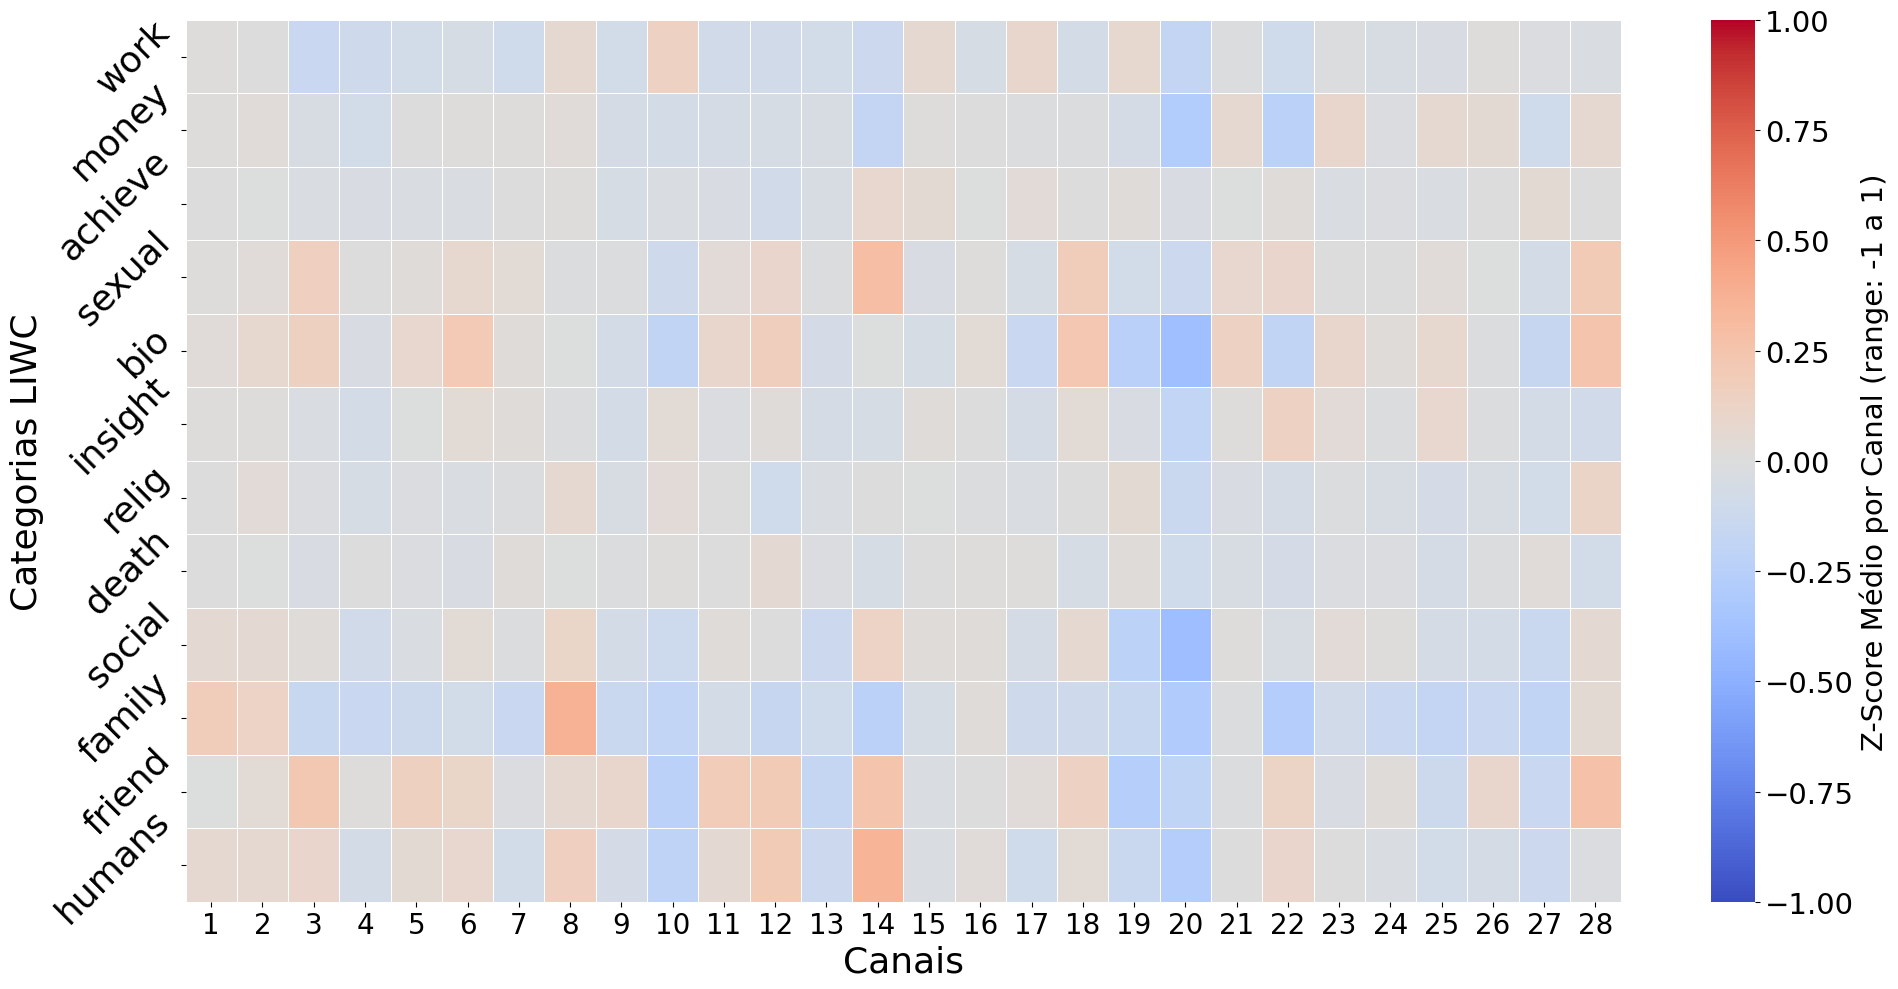

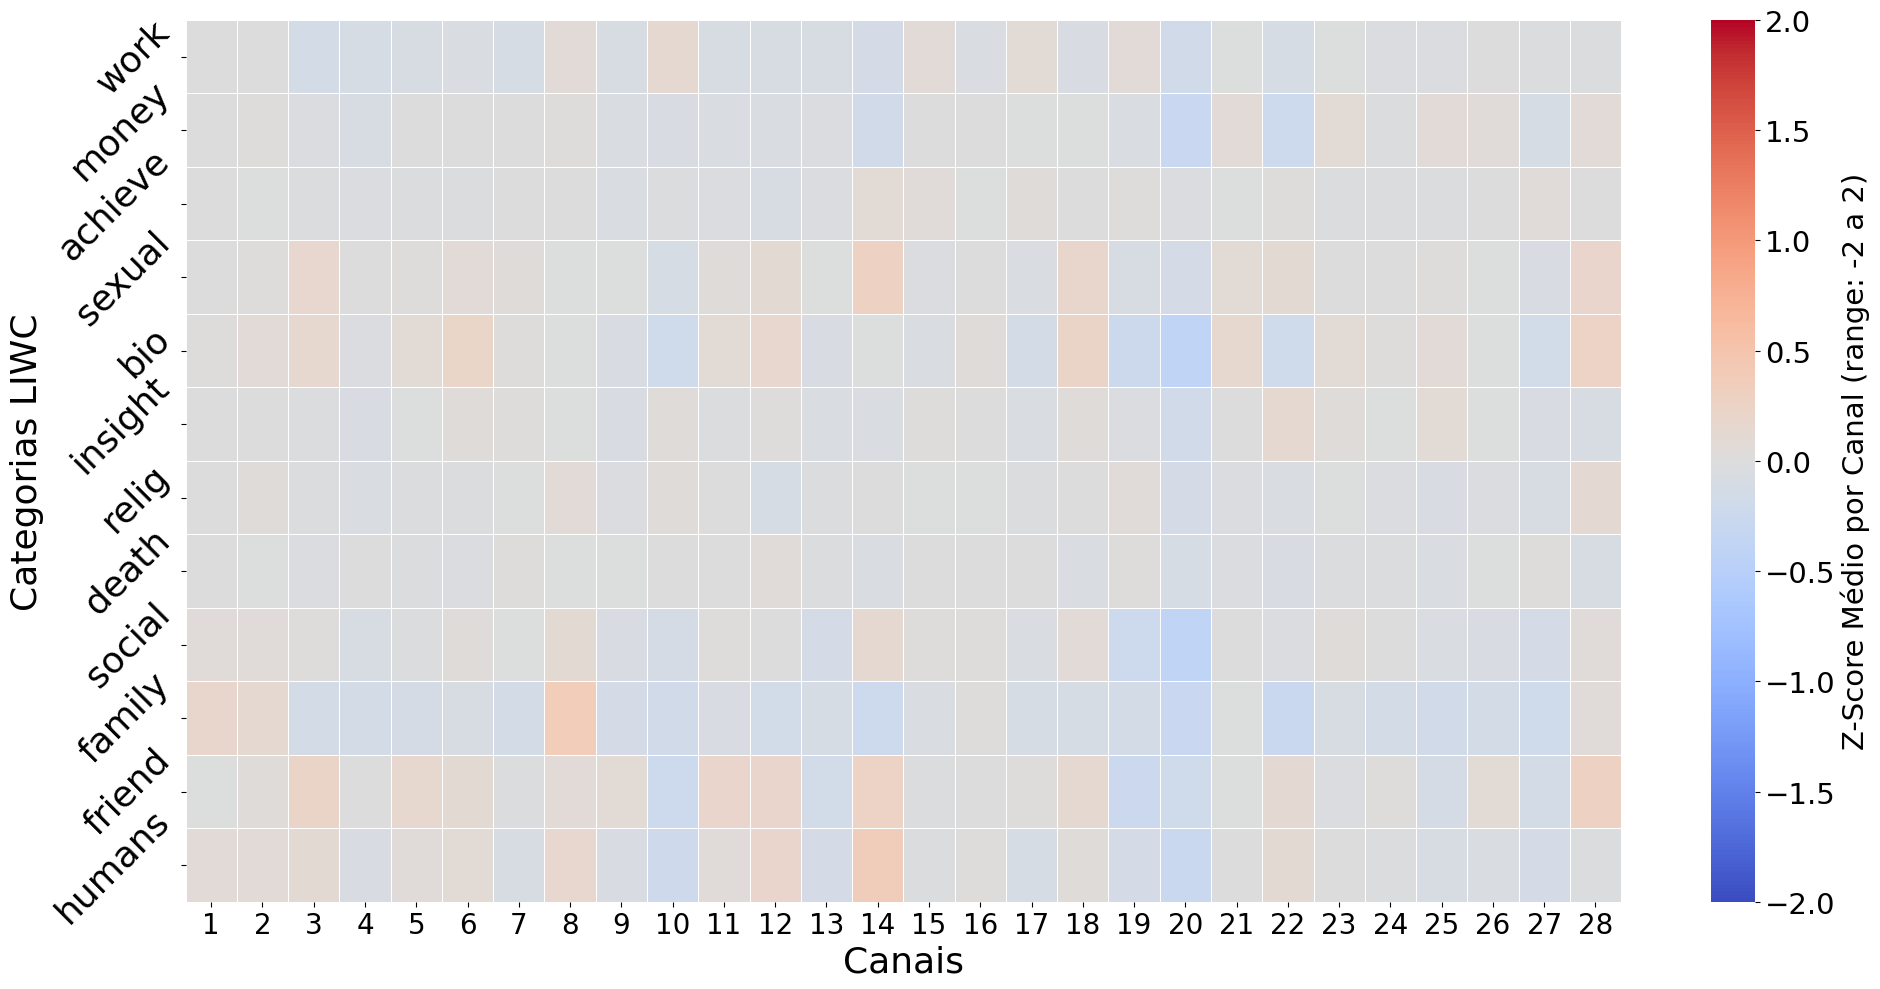

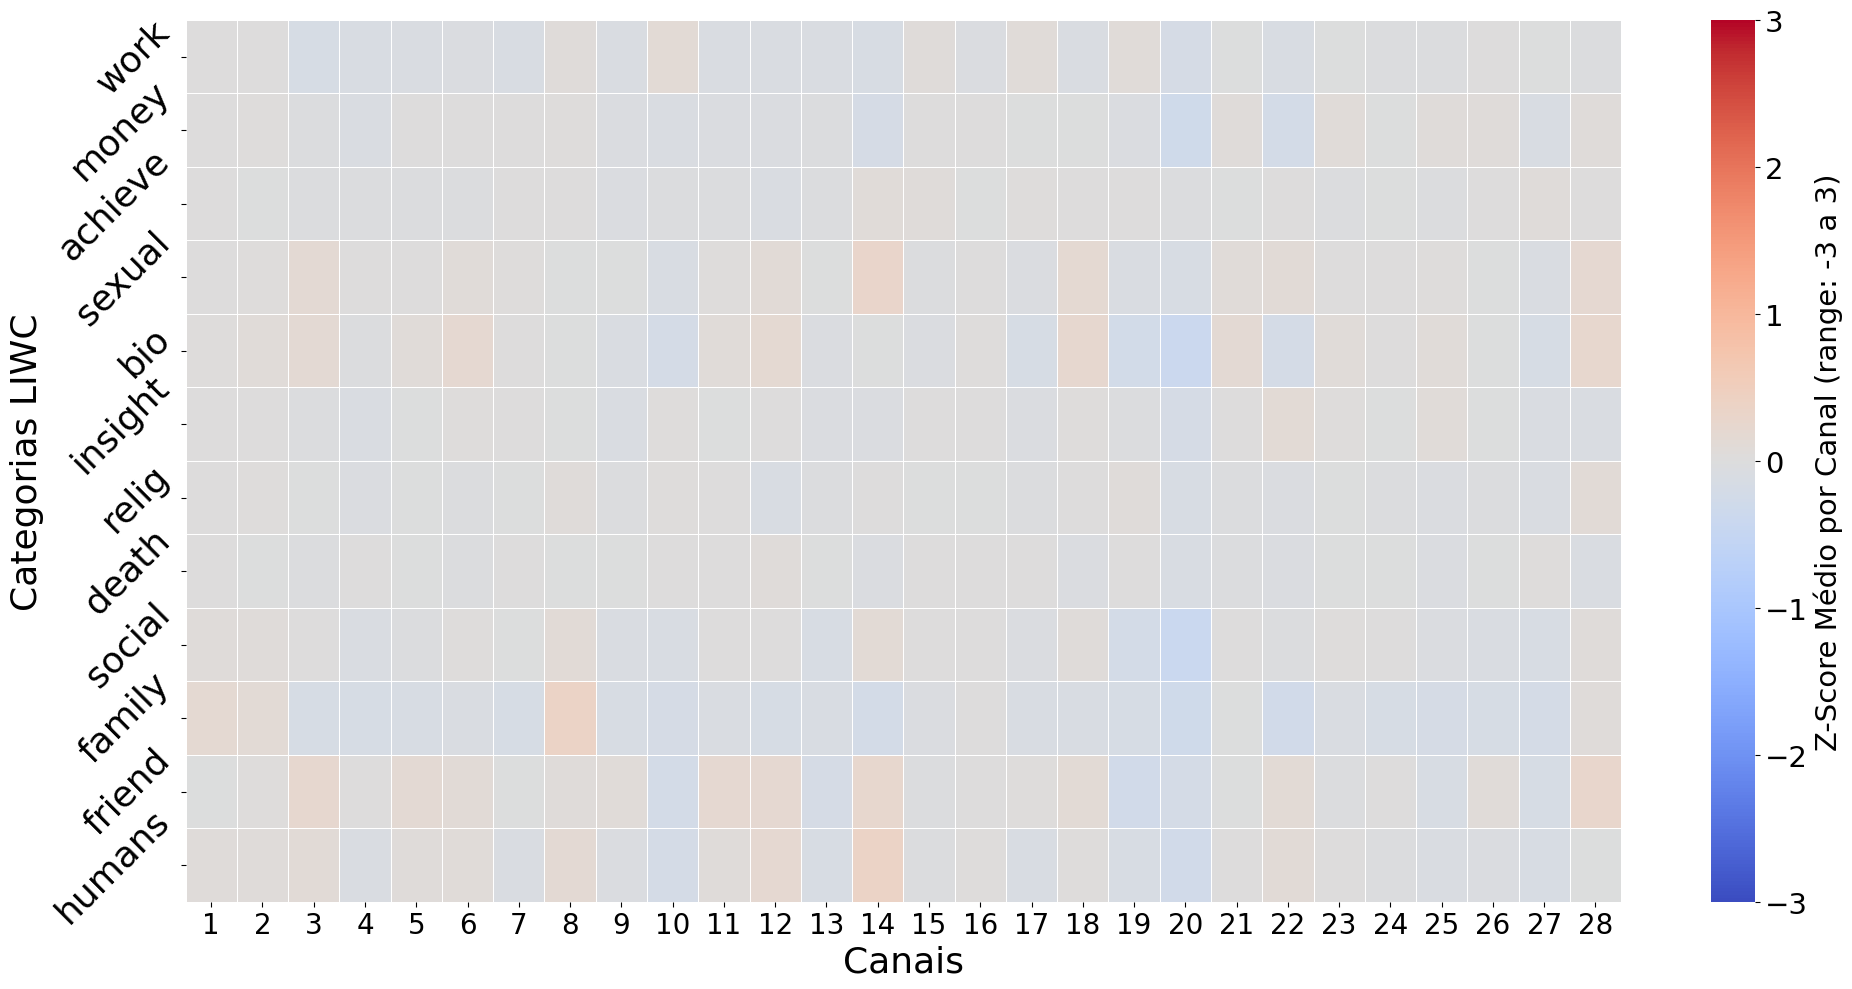

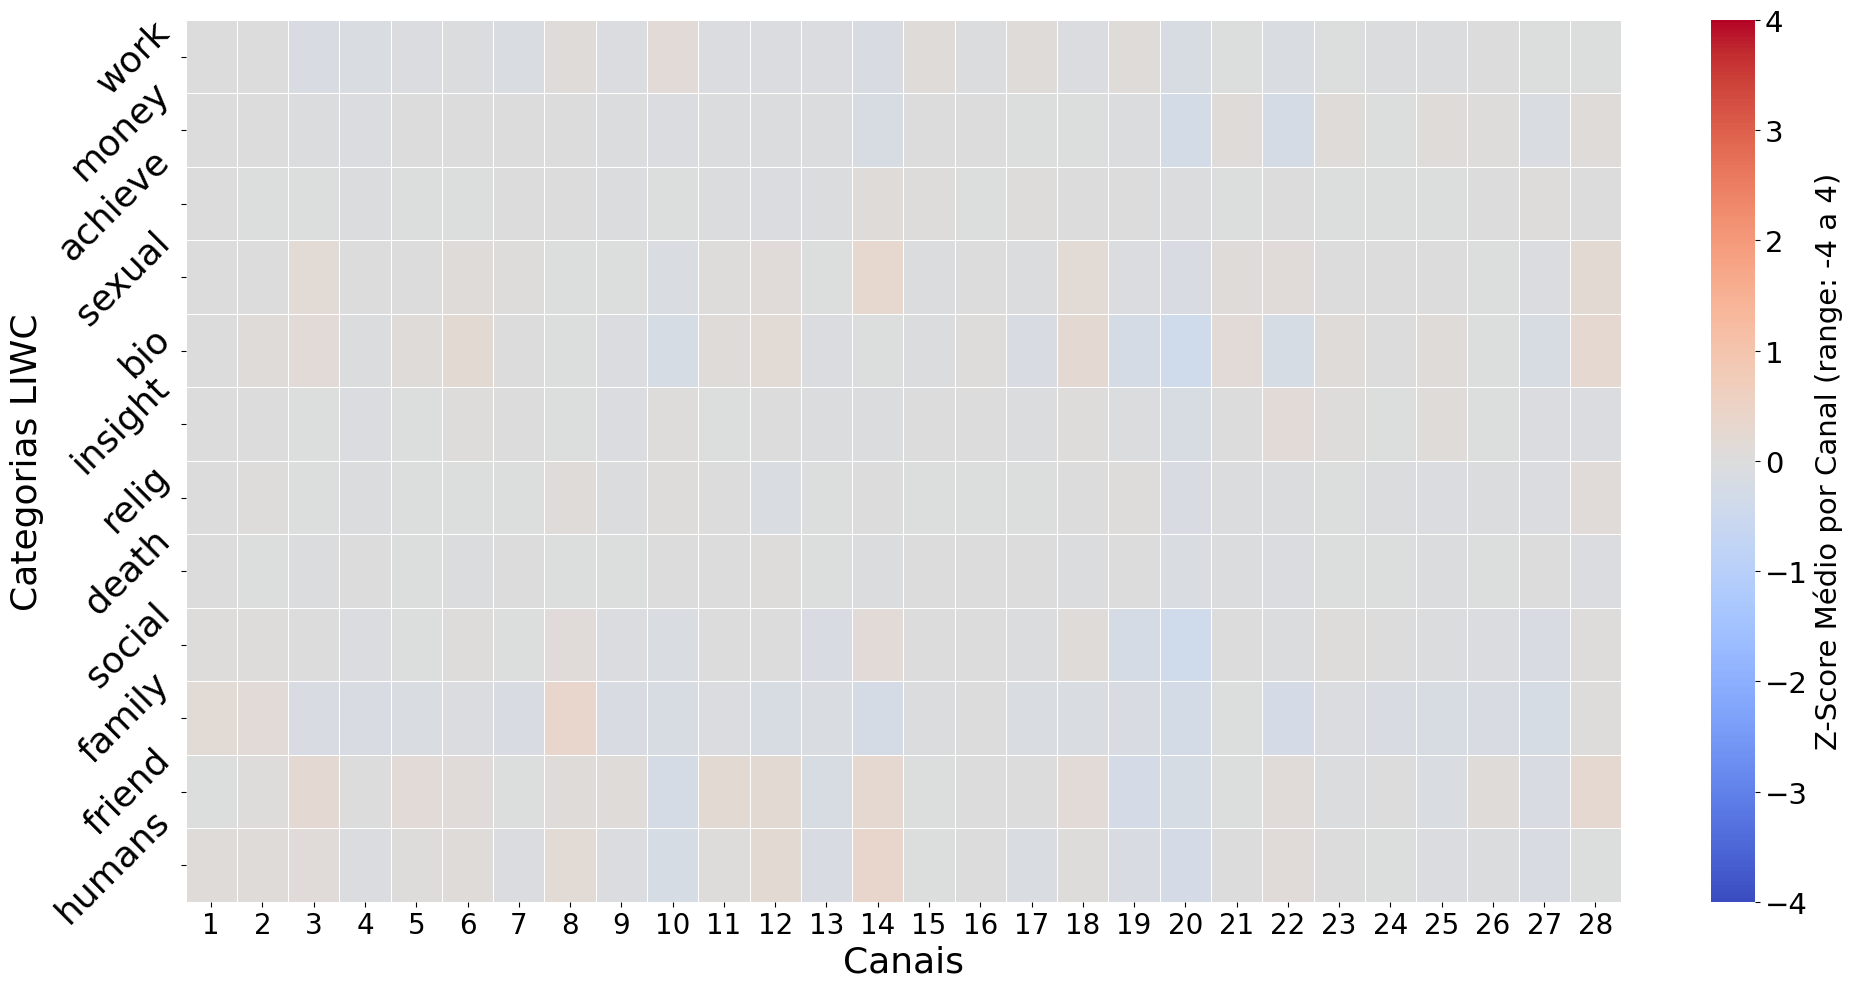

In [ ]:
plot_multiple_zscore_heatmaps(df_comentarios)

In [ ]:
categories_to_plot_z = [
    "work_zscore", "money_zscore", "achieve_zscore",
    "sexual_zscore", "bio_zscore",
    "insight_zscore", "relig_zscore", "death_zscore",
    "social_zscore", "family_zscore", "friend_zscore", "humans_zscore"
]

# Calculate the mean z-score for each category per channel
mean_zscores = df_comentarios.groupby('id_canal_anonimizado')[categories_to_plot_z].mean()

# Find the channel with the highest and lowest mean z-score for each category
max_zscores = mean_zscores.idxmax().rename('Highest Z-Score Channel')
min_zscores = mean_zscores.idxmin().rename('Lowest Z-Score Channel')

# Get the corresponding z-score values
max_values = mean_zscores.max().rename('Highest Z-Score Value')
min_values = mean_zscores.min().rename('Lowest Z-Score Value')


# Combine the results into a single DataFrame
summary_zscores = pd.concat([max_zscores, max_values, min_zscores, min_values], axis=1)

# Round the numerical columns to 1 decimal place
summary_zscores[['Highest Z-Score Value', 'Lowest Z-Score Value']] = summary_zscores[['Highest Z-Score Value', 'Lowest Z-Score Value']].round(1)


# Remove the "_zscore" suffix from the index for better readability
summary_zscores.index = [cat.replace("_zscore", "") for cat in summary_zscores.index]

print("Summary of Highest and Lowest Z-Scores per LIWC Category (Videos):")
display(summary_zscores)

Summary of Highest and Lowest Z-Scores per LIWC Category (Videos):


,Highest Z-Score Channel,Highest Z-Score Value,Lowest Z-Score Channel,Lowest Z-Score Value
work,canal_10,0.1,canal_20,-0.2
money,canal_23,0.1,canal_20,-0.3
achieve,canal_14,0.1,canal_12,-0.1
sexual,canal_14,0.3,canal_20,-0.1
bio,canal_28,0.3,canal_20,-0.4
insight,canal_22,0.1,canal_20,-0.2
relig,canal_28,0.1,canal_20,-0.1
death,canal_12,0.1,canal_20,-0.1
social,canal_14,0.1,canal_20,-0.4
family,canal_8,0.4,canal_20,-0.3


In [ ]:
# Calcula a média de cada categoria LIWC
mean_liwc_categories = df_comentarios[categories_to_plot_z].mean()

# Remove o sufixo "_zscore" para melhor legibilidade
mean_liwc_categories.index = [cat.replace("_zscore", "") for cat in mean_liwc_categories.index]

# Ordena as médias em ordem decrescente
mean_liwc_categories_sorted = mean_liwc_categories.sort_values(ascending=False)

print("Média de cada categoria LIWC (ordenada decrescentemente):")
display(mean_liwc_categories_sorted)